In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [5]:
file_path = r"C:\Users\kmalangwasila\OneDrive - Malawi Revenue Authority\Desktop\ML_Folder\price_prediction_batch_20_Car_Price.csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
# Checking the top 5 rows using the dataframe.head() method
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,No,186005.0,NaN,Automatic,4x4,4.0,Left wheel,Silver,12.0
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,No,192000.0,6.0,Tiptronic,4x4,4.0,Left wheel,Black,8.0
2,45774419,8467.0,0.0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,No,200000.0,4.0,Variator,Front,4.0,Right-hand drive,Black,2.0
3,45769185,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,No,168966.0,4.0,Automatic,4x4,4.0,Left wheel,White,0.0
4,45809263,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,No,91901.0,4.0,Automatic,Front,4.0,Left wheel,Silver,4.0


In [11]:
# To view the last 5 rows in the data set
df.tail(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467.0,0.0,MERCEDES-BENZ,CLK 200,1999.0,Coupe,Yes,CNG,2.0,Yes,300000.0,4.0,Manual,Rear,2.0,Left wheel,Silver,5.0
19233,45778856,15681.0,831.0,HYUNDAI,Sonata,2011.0,Sedan,Yes,Petrol,2.4,No,161600.0,4.0,Tiptronic,Front,4.0,Left wheel,Red,8.0
19234,45804997,26108.0,836.0,HYUNDAI,Tucson,2010.0,Jeep,Yes,Diesel,2.0,No,116365.0,4.0,Automatic,Front,4.0,Left wheel,Grey,4.0
19235,45793526,5331.0,1288.0,CHEVROLET,Captiva,2007.0,Jeep,Yes,Diesel,2.0,No,51258.0,4.0,Automatic,Front,4.0,Left wheel,Black,4.0
19236,45813273,470.0,753.0,HYUNDAI,Sonata,2012.0,Sedan,Yes,Hybrid,2.4,No,186923.0,4.0,Automatic,Front,4.0,Left wheel,White,12.0


In [12]:
# Appreciating the columns
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Turbo',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [13]:
df.shape

(19237, 19)

## Question 1

# 1a  Analyse data types of features and verify they hold data same as that of their datatype. update if required.

In [14]:
df.dtypes

ID                   object
Price               float64
Levy                float64
Manufacturer         object
Model                object
Prod. year          float64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Turbo                object
Mileage             float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors               float64
Wheel                object
Color                object
Airbags             float64
dtype: object

In [15]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,No,186005.0,NaN,Automatic,4x4,4.0,Left wheel,Silver,12.0
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,No,192000.0,6.0,Tiptronic,4x4,4.0,Left wheel,Black,8.0
2,45774419,8467.0,0.0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,No,200000.0,4.0,Variator,Front,4.0,Right-hand drive,Black,2.0
3,45769185,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,No,168966.0,4.0,Automatic,4x4,4.0,Left wheel,White,0.0
4,45809263,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,No,91901.0,4.0,Automatic,Front,4.0,Left wheel,Silver,4.0


# Evaluating for Missing Data

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [16]:
missing_data = df.isnull()
missing_data.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Count missing values in each column using for loop

In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

ID
ID
False    19237
Name: count, dtype: int64

Price
Price
False    19227
True        10
Name: count, dtype: int64

Levy
Levy
False    19227
True        10
Name: count, dtype: int64

Manufacturer
Manufacturer
False    19227
True        10
Name: count, dtype: int64

Model
Model
False    19227
True        10
Name: count, dtype: int64

Prod. year
Prod. year
False    19227
True        10
Name: count, dtype: int64

Category
Category
False    19227
True        10
Name: count, dtype: int64

Leather interior
Leather interior
False    19227
True        10
Name: count, dtype: int64

Fuel type
Fuel type
False    19227
True        10
Name: count, dtype: int64

Engine volume
Engine volume
False    19227
True        10
Name: count, dtype: int64

Turbo
Turbo
False    19227
True        10
Name: count, dtype: int64

Mileage
Mileage
False    19227
True        10
Name: count, dtype: int64

Cylinders
Cylinders
False    19207
True        30
Name: count, dtype: int64

Gear box type
Gear box type
False    1

Based on the summary above, each column has 19237 rows of data, following columns containing missing data:

1. "Price": 10 missing data
2. "Levy": 10 missing data
3. "Manufacturer": 10 missing data
4. "Model": 10 missing data, same with Period Year, category, Leather interior, fuel type, engine volume
/mileage, Gear box, drive wheels, doors, wheel,color, Airbags all have 10 missing data points
5. "Cylinder": 30 missing data

Dealing with missing Data

1. Drop the whole row:

"price": 10 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [18]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["Price"], axis=0, inplace=True)

# reset index, because we droped ten (10) rows
df.reset_index(drop=True, inplace=True)

2. Replacing with Mean on numeric (float) data points

Calculate the average of the Levy column 

In [19]:
avg_Levy = df["Levy"].astype("float").mean(axis=0)
print("Average of Levy:", avg_Levy)

Average of Levy: 632.5229104904562


Replace "NaN" by mean value in "Levy" column

In [20]:
df["Levy"].replace(np.nan, avg_Levy, inplace=True)

Calculate the average of the Production Year

In [21]:
avg_year = df["Prod. year"].astype("float").mean(axis=0)
print("Average of Prod. year:", avg_year)

Average of Prod. year: 2010.9128829250533


Replace "NaN" by mean value in "Prod. year" column

In [22]:
df["Prod. year"].replace(np.nan, avg_Levy, inplace=True)

Calculate the average of the Engine Volume

In [23]:
avg_Engine_volume = df["Engine volume"].astype("float").mean(axis=0)
print("Average of Engine volume:", avg_Engine_volume)

Average of Engine volume: 2.307687106672908


Replace "NaN" by mean value in "Engine volume" column

In [24]:
df["Engine volume"].replace(np.nan, avg_Levy, inplace=True)

Calculate the average of the Mileage

In [25]:
avg_Mileage = df["Mileage"].astype("float").mean(axis=0)
print("Average of Mileage:", avg_Mileage)

Average of Mileage: 1532961.0405679513


Replace "NaN" by mean value in "Mileage" column

In [26]:
df["Mileage"].replace(np.nan, avg_Levy, inplace=True)

Calculate the average of the Cylinders

In [27]:
avg_Cylinders = df["Cylinders"].astype("float").mean(axis=0)
print("Average of Cylinders:", avg_Cylinders)

Average of Cylinders: 4.582183578903525


Replace "NaN" by mean value in "Cylinders" column

In [28]:
df["Cylinders"].replace(np.nan, avg_Levy, inplace=True)

Calculate the mode of the Doors

In [29]:
df['Doors'].value_counts()

Doors
4.0    18323
2.0      776
5.0      128
Name: count, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [30]:
df['Doors'].value_counts().idxmax()

4.0

In [31]:
#replace the missing 'num-of-doors' values by the most frequent 
df["Doors"].replace(np.nan, "4", inplace=True)

Most common Manufacturer

In [32]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3661
MERCEDES-BENZ    2073
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

We can see that Hyundai are the most common Manufacturer. we can also use ".idxmax()" method to calculate the most common automatically

In [33]:
df['Manufacturer'].value_counts().idxmax()

'HYUNDAI'

In [34]:
#replace the missing 'Manufacturer' values by the most frequent 
df["Manufacturer"].replace(np.nan, "HYUNDAI", inplace=True)

In [35]:
df['Model'].value_counts().idxmax()

'Prius'

In [36]:
#replace the missing 'Model' values by the most frequent 
df["Model"].replace(np.nan, "Prius", inplace=True)

In [37]:
df['Category'].value_counts().idxmax()

'Sedan'

In [38]:
#replace the missing 'Category' values by the most frequent 
df["Category"].replace(np.nan, "Sedan", inplace=True)

In [39]:
df['Leather interior'].value_counts().idxmax()

'Yes'

In [40]:
#replace the missing 'Leather interior' values by the most frequent 
df["Leather interior"].replace(np.nan, "Yes", inplace=True)

In [41]:
df['Fuel type'].value_counts().idxmax()

'Petrol'

In [42]:
#replace the missing 'Fuel type' values by the most frequent 
df["Fuel type"].replace(np.nan, "Petrol", inplace=True)

In [43]:
df['Turbo'].value_counts().idxmax()

'No'

In [44]:
#replace the missing 'Turbo' values by the most frequent 
df["Turbo"].replace(np.nan, "No", inplace=True)

In [45]:
df['Gear box type'].value_counts().idxmax()

'Automatic'

In [46]:
#replace the missing 'Gear Box' values by the most frequent 
df["Gear box type"].replace(np.nan, "Automatic", inplace=True)

In [47]:
df['Drive wheels'].value_counts().idxmax()

'Front'

In [48]:
#replace the missing 'Drive wheels' values by the most frequent 
df["Drive wheels"].replace(np.nan, "Front", inplace=True)

In [49]:
df['Wheel'].value_counts().idxmax()

'Left wheel'

In [50]:
#replace the missing 'Wheel' values by the most frequent 
df["Wheel"].replace(np.nan, "Left wheel", inplace=True)

In [51]:
df['Color'].value_counts().idxmax()

'Black'

In [52]:
#replace the missing 'Drive wheels' values by the most frequent 
df["Color"].replace(np.nan, "Black", inplace=True)

In [53]:
missing_data = df.isnull()
missing_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


All missing data is dealt with either by replacing with mean or mode values

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19227 entries, 0 to 19226
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19227 non-null  object 
 1   Price             19227 non-null  float64
 2   Levy              19227 non-null  float64
 3   Manufacturer      19227 non-null  object 
 4   Model             19227 non-null  object 
 5   Prod. year        19227 non-null  float64
 6   Category          19227 non-null  object 
 7   Leather interior  19227 non-null  object 
 8   Fuel type         19227 non-null  object 
 9   Engine volume     19227 non-null  float64
 10  Turbo             19227 non-null  object 
 11  Mileage           19227 non-null  float64
 12  Cylinders         19227 non-null  float64
 13  Gear box type     19227 non-null  object 
 14  Drive wheels      19227 non-null  object 
 15  Doors             19227 non-null  float64
 16  Wheel             19227 non-null  object

# Section 2
Checking for duplicates

In [55]:
duplicates = df[df.duplicated(keep="first")]

In [56]:
print(duplicates)

             ID    Price    Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840.0     0.0  MERCEDES-BENZ        E 200      1998.0   
1581   45815363   8781.0     0.0         TOYOTA          Ist      2002.0   
1697   45732125  18503.0     0.0         TOYOTA        Prius      2010.0   
1972   45507765  20385.0     0.0  MERCEDES-BENZ      CLS 500      2005.0   
2131   45815363   8781.0     0.0         TOYOTA          Ist      2002.0   
...         ...      ...     ...            ...          ...         ...   
18964  45815465   2352.0  1273.0          LEXUS       IS 350      2015.0   
19127  45810466  15125.0   642.0      CHEVROLET      Orlando      2012.0   
19190  45725908  36065.0   640.0  MERCEDES-BENZ  CLA 250 AMG      2013.0   
19193  45761487  13485.0   645.0         TOYOTA        Prius      2011.0   
19200  45732939   8311.0   642.0        HYUNDAI       Sonata      2012.0   

        Category Leather interior Fuel type  Engine volume Turbo   Mileage  \
425      

# Removing duplicates and update the Dataframe

In [57]:
df=df.drop_duplicates(keep='first')

In [58]:
print(df)

             ID    Price    Levy   Manufacturer    Model  Prod. year  \
0      45654403  13328.0  1399.0          LEXUS   RX 450      2010.0   
1      44731507  16621.0  1018.0      CHEVROLET  Equinox      2011.0   
2      45774419   8467.0     0.0          HONDA      FIT      2006.0   
3      45769185   3607.0   862.0           FORD   Escape      2011.0   
4      45809263  11726.0   446.0          HONDA      FIT      2014.0   
...         ...      ...     ...            ...      ...         ...   
19222  45798355   8467.0     0.0  MERCEDES-BENZ  CLK 200      1999.0   
19223  45778856  15681.0   831.0        HYUNDAI   Sonata      2011.0   
19224  45804997  26108.0   836.0        HYUNDAI   Tucson      2010.0   
19225  45793526   5331.0  1288.0      CHEVROLET  Captiva      2007.0   
19226  45813273    470.0   753.0        HYUNDAI   Sonata      2012.0   

        Category Leather interior Fuel type  Engine volume Turbo   Mileage  \
0           Jeep              Yes    Hybrid            3.

In [59]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,No,186005.0,632.52291,Automatic,4x4,4.0,Left wheel,Silver,12.0
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,No,192000.0,6.00000,Tiptronic,4x4,4.0,Left wheel,Black,8.0
2,45774419,8467.0,0.0,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,No,200000.0,4.00000,Variator,Front,4.0,Right-hand drive,Black,2.0
3,45769185,3607.0,862.0,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,No,168966.0,4.00000,Automatic,4x4,4.0,Left wheel,White,0.0
4,45809263,11726.0,446.0,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,No,91901.0,4.00000,Automatic,Front,4.0,Left wheel,Silver,4.0


In [60]:
df.shape # the output shows that duplicated rows are removed

(18914, 19)

# Check for outliers using boxplot and statistical method, and remove them, if any

In [61]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [62]:
%%capture
! pip install seaborn

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


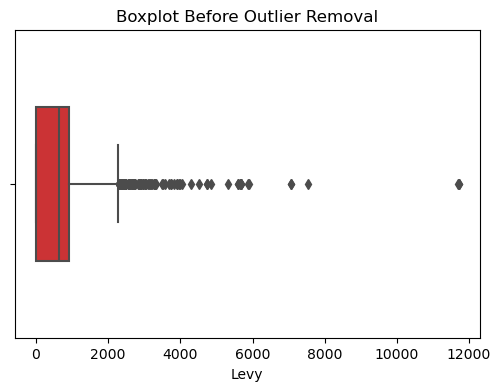

Mean before: 632.880829015544
Standard Deviation before: 568.1891558251865
Q1 before: 0.0
Q3 before: 915.75


In [64]:
# Assuming 'data' is your dataset before removing outliers
mean_before = df['Levy'].mean()
std_dev_before = df['Levy'].std()
Q1_before = df['Levy'].quantile(0.25)
Q3_before = df['Levy'].quantile(0.75)

# Create a boxplot for visualization
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Levy'], orient='v', width=0.5, palette='Set1')
plt.title('Boxplot Before Outlier Removal')
plt.show()

# Print summary statistics
print(f"Mean before: {mean_before}")
print(f"Standard Deviation before: {std_dev_before}")
print(f"Q1 before: {Q1_before}")
print(f"Q3 before: {Q3_before}")

Inspecting distribution of numerical variables in Levy column using boxplot to detect outliers

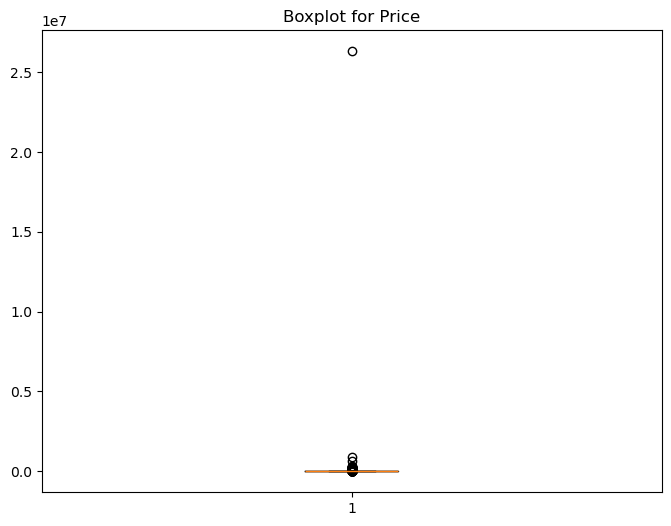

In [65]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Price"])
plt.title(f'Boxplot for {"Price"}')
plt.show()

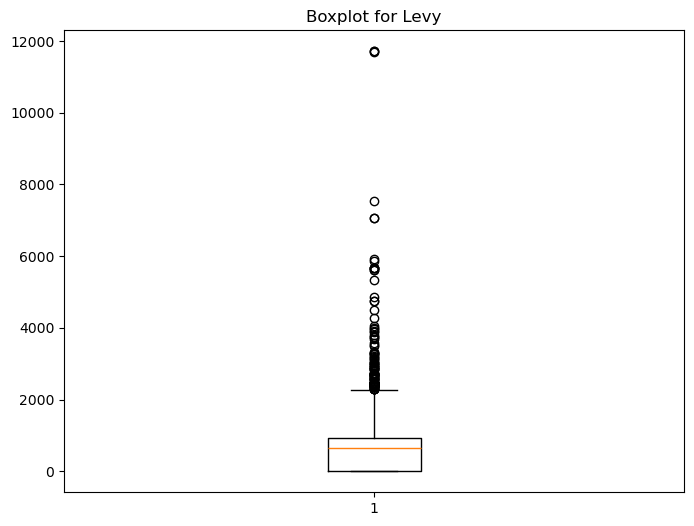

In [66]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Levy"])
plt.title(f'Boxplot for {"Levy"}')
plt.show()

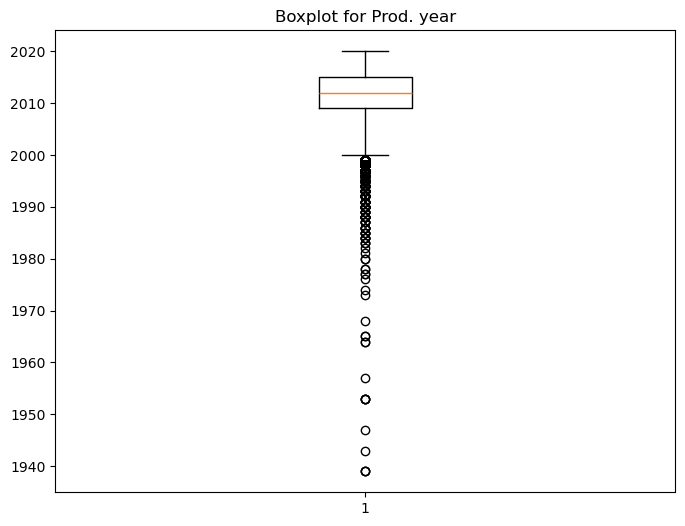

In [67]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Prod. year"])
plt.title(f'Boxplot for {"Prod. year"}')
plt.show()

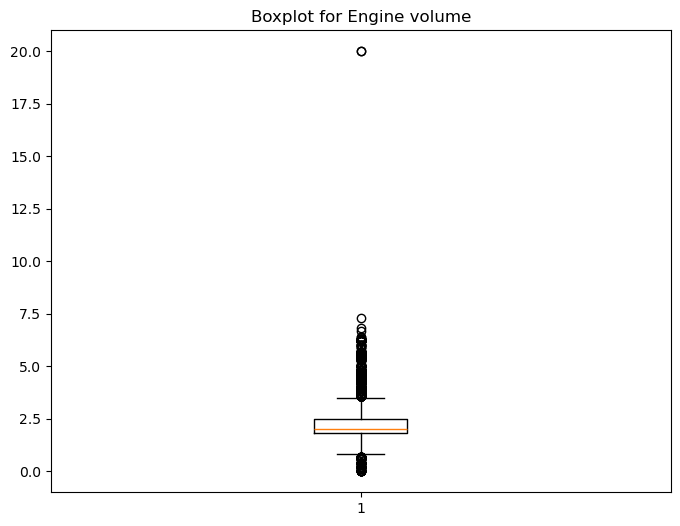

In [68]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Engine volume"])
plt.title(f'Boxplot for {"Engine volume"}')
plt.show()

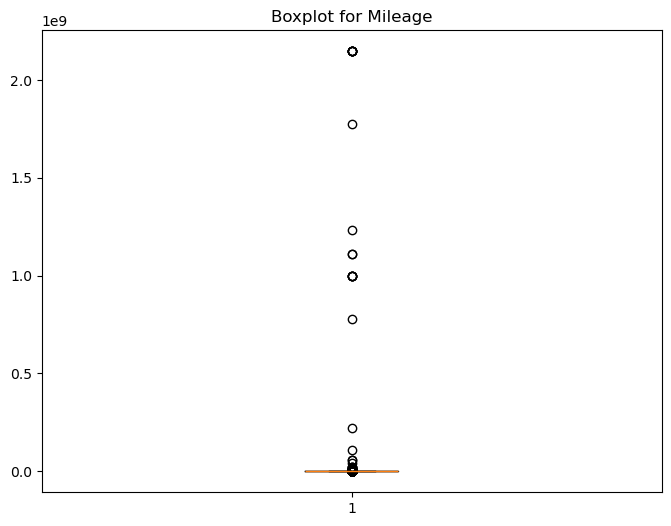

In [69]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Mileage"])
plt.title(f'Boxplot for {"Mileage"}')
plt.show()

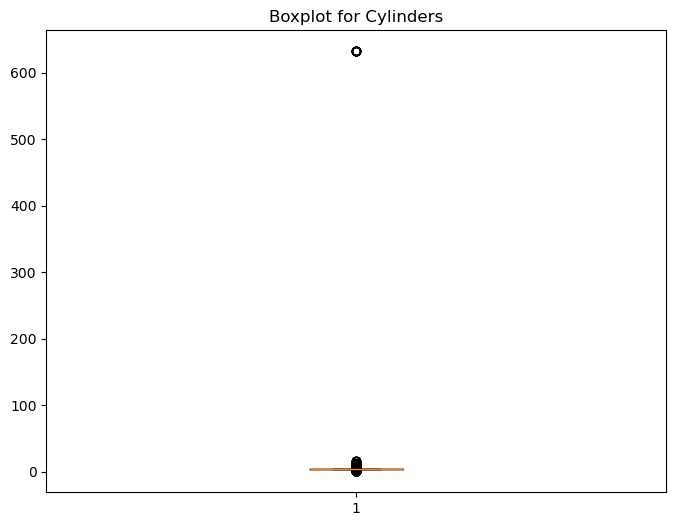

In [70]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Cylinders"])
plt.title(f'Boxplot for {"Cylinders"}')
plt.show()

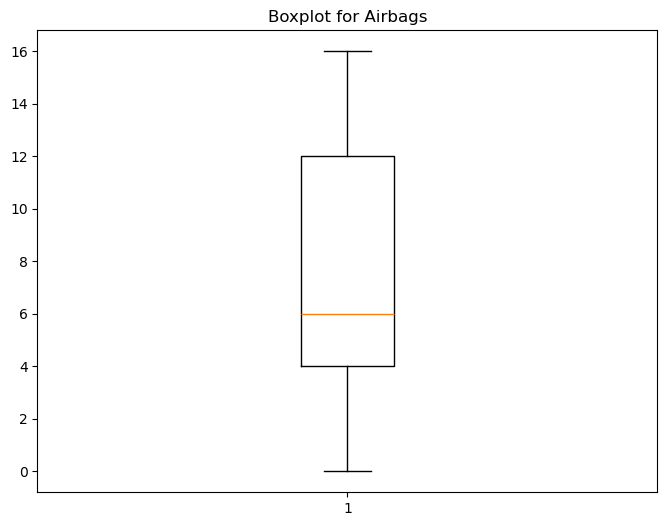

In [71]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Airbags"])
plt.title(f'Boxplot for {"Airbags"}')
plt.show()

Calculate the Interquartile Range (IQR) to identify potential outliers. Typically, values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers. Let usdefine a function to detect and remove them:

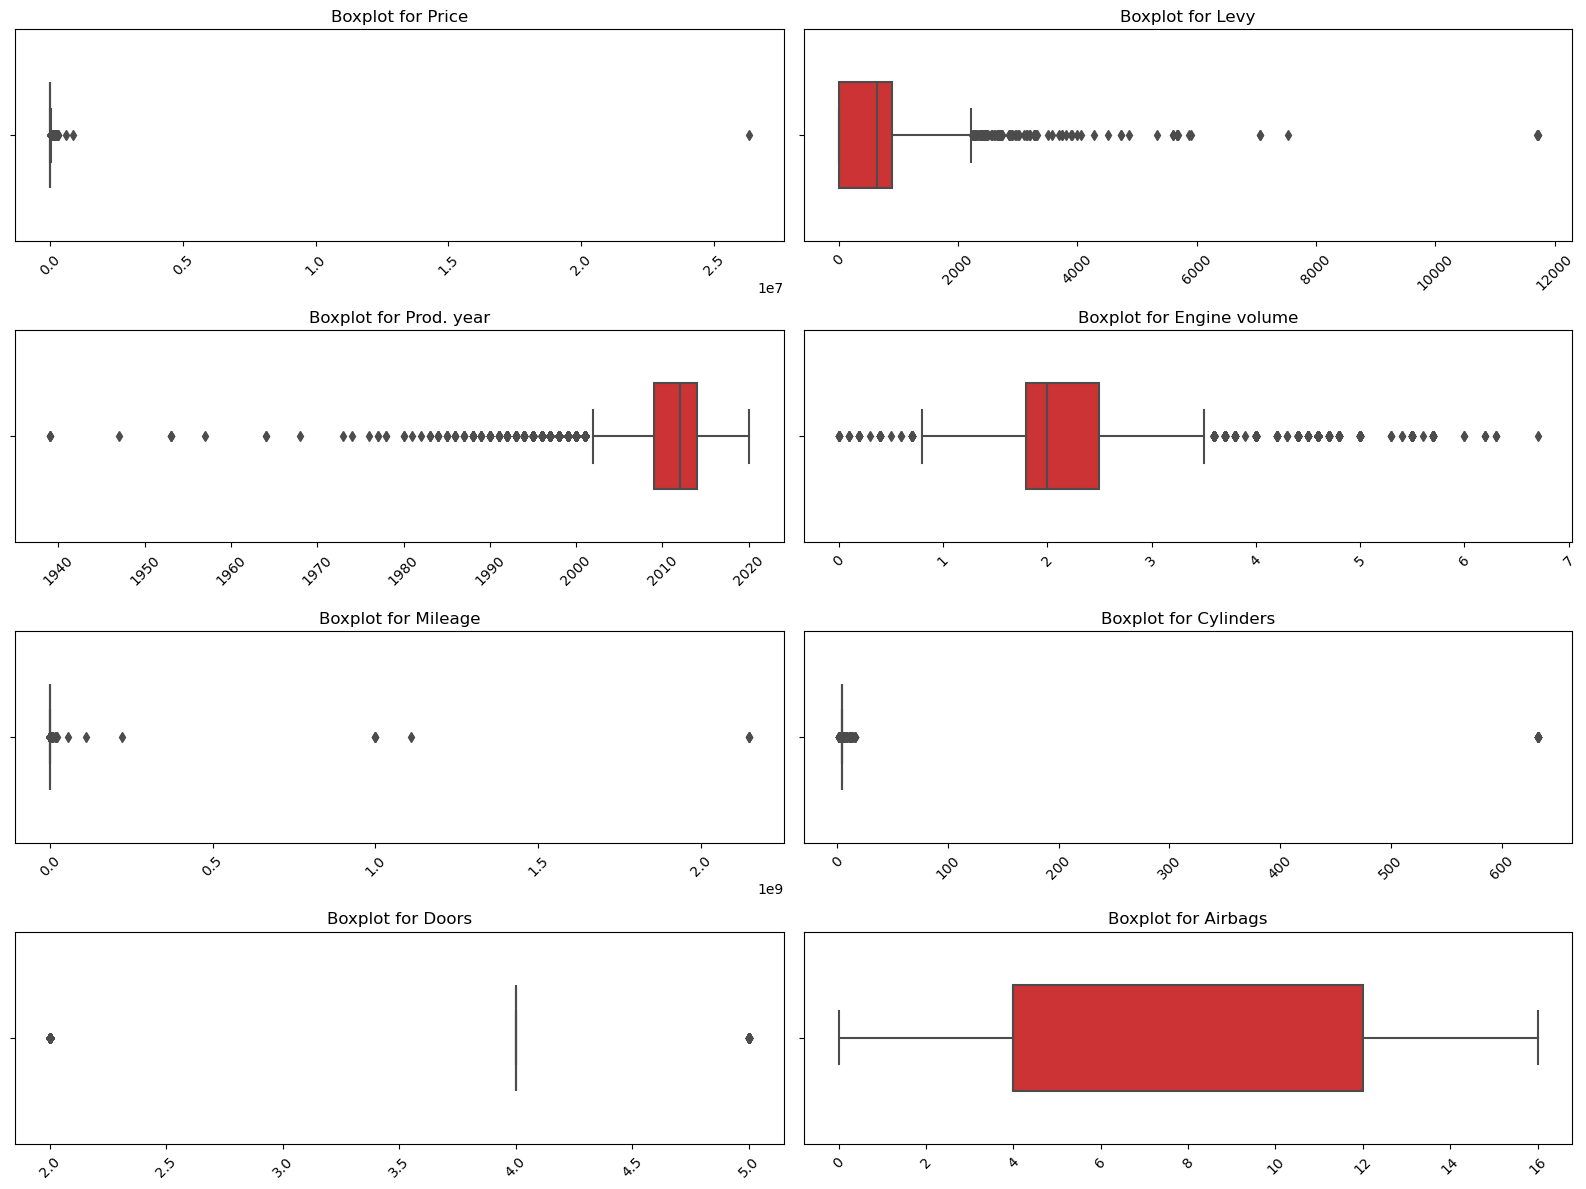

In [72]:
# Define the list of numerical features for which you want to detect and remove outliers
numerical_features = ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']

# Create a subplot for each numerical feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], orient='v', width=0.5, palette='Set1')
    plt.title(f'Boxplot for {feature}')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation=45)

    # Detect and remove outliers for the current feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    df = df[~df.index.isin(outliers.index)]

plt.tight_layout()
plt.show()

# Now, 'df' contains the dataset with outliers removed.
#This code creates box plots for the specified numerical features and removes outliers using the Interquartile Range (IQR) method. After running the code, the data DataFrame will contain the dataset with outliers removed. Note that you should replace the example dataset with your actual dataset by reading it from a file using pd.read_csv or other relevant methods.







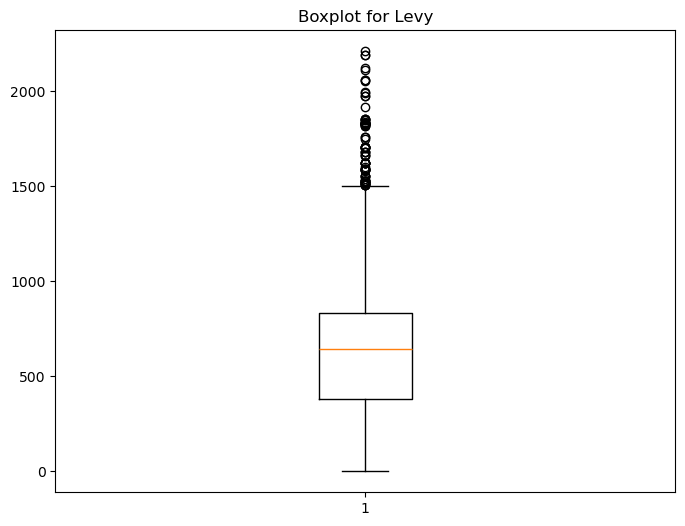

In [73]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["Levy"])
plt.title(f'Boxplot for {"Levy"}')
plt.show()

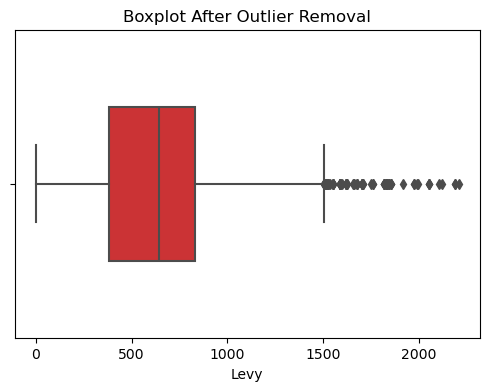

Mean after: 594.8010511804239
Standard Deviation after: 379.9003846423133
Q1 after: 382.0
Q3 after: 831.0


In [74]:
# Assuming 'data' is your dataset after removing outliers
mean_after = df['Levy'].mean()
std_dev_after = df['Levy'].std()
Q1_after = df['Levy'].quantile(0.25)
Q3_after = df['Levy'].quantile(0.75)

# Create a boxplot for visualization
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Levy'], orient='v', width=0.5, palette='Set1')
plt.title('Boxplot After Outlier Removal')
plt.show()

# Print summary statistics
print(f"Mean after: {mean_after}")
print(f"Standard Deviation after: {std_dev_after}")
print(f"Q1 after: {Q1_after}")
print(f"Q3 after: {Q3_after}")

In [75]:
# Getting a Statistical Summary
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,11606.000000,11606.000000,11606.000000,11606.000000,11606.000000,11606.0,11606.0,11606.000000
mean,15383.269343,594.801051,2012.354730,1.937214,121666.710150,4.0,4.0,6.391866
std,11375.330518,379.900385,3.585727,0.392951,71311.539636,0.0,0.0,4.090044
min,1.000000,0.000000,2002.000000,0.800000,0.000000,4.0,4.0,0.000000
25%,6817.000000,382.000000,2011.000000,1.600000,69000.000000,4.0,4.0,4.000000
50%,14269.000000,642.000000,2013.000000,2.000000,116800.000000,4.0,4.0,4.000000
75%,21326.000000,831.000000,2015.000000,2.200000,164556.000000,4.0,4.0,12.000000
max,47120.000000,2209.000000,2020.000000,3.500000,346470.000000,4.0,4.0,16.000000


## For categorical features, draw countplot. Write observations. 

In [76]:
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Turbo',
       'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color', 'Airbags'],
      dtype='object')


In [77]:
df["Category"] = df["Category"].astype(str)

In [78]:
df["Category"] = df["Category"].apply(str)

In [79]:
df['Category'] = df['Category'].str.strip().astype(str)

In [80]:
df.dtypes

ID                   object
Price               float64
Levy                float64
Manufacturer         object
Model                object
Prod. year          float64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Turbo                object
Mileage             float64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors               float64
Wheel                object
Color                object
Airbags             float64
dtype: object

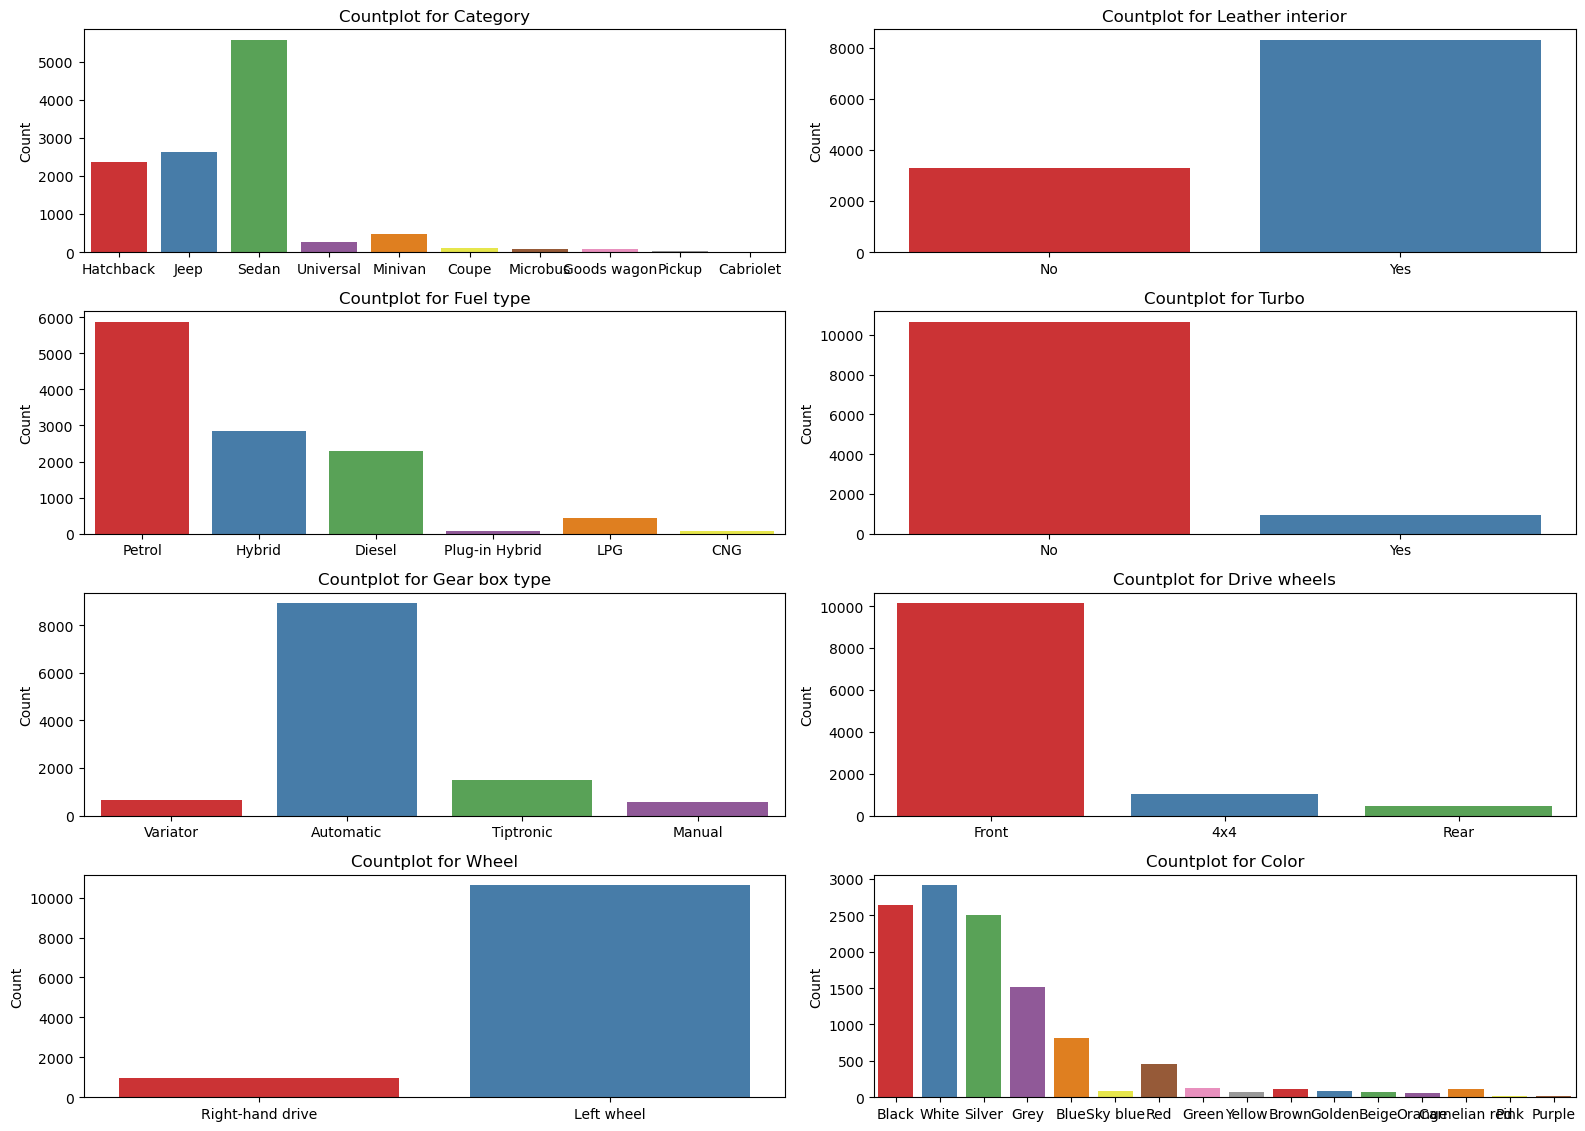

In [81]:
# Define the list of categorical features for which you want to draw count plots
categorical_features = ["Category", "Leather interior", "Fuel type", "Turbo", "Gear box type", "Drive wheels", "Wheel", "Color"]

# Set up the subplots for countplots
plt.figure(figsize=(16, 14))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i + 1)
    sns.countplot(data=df, x=feature, palette='Set1')
    plt.title(f'Countplot for {feature}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## For numeric features, draw a histogram. Compute and about skewness of variables and apply transformation function, if needed.

In [82]:
from scipy.stats import skew

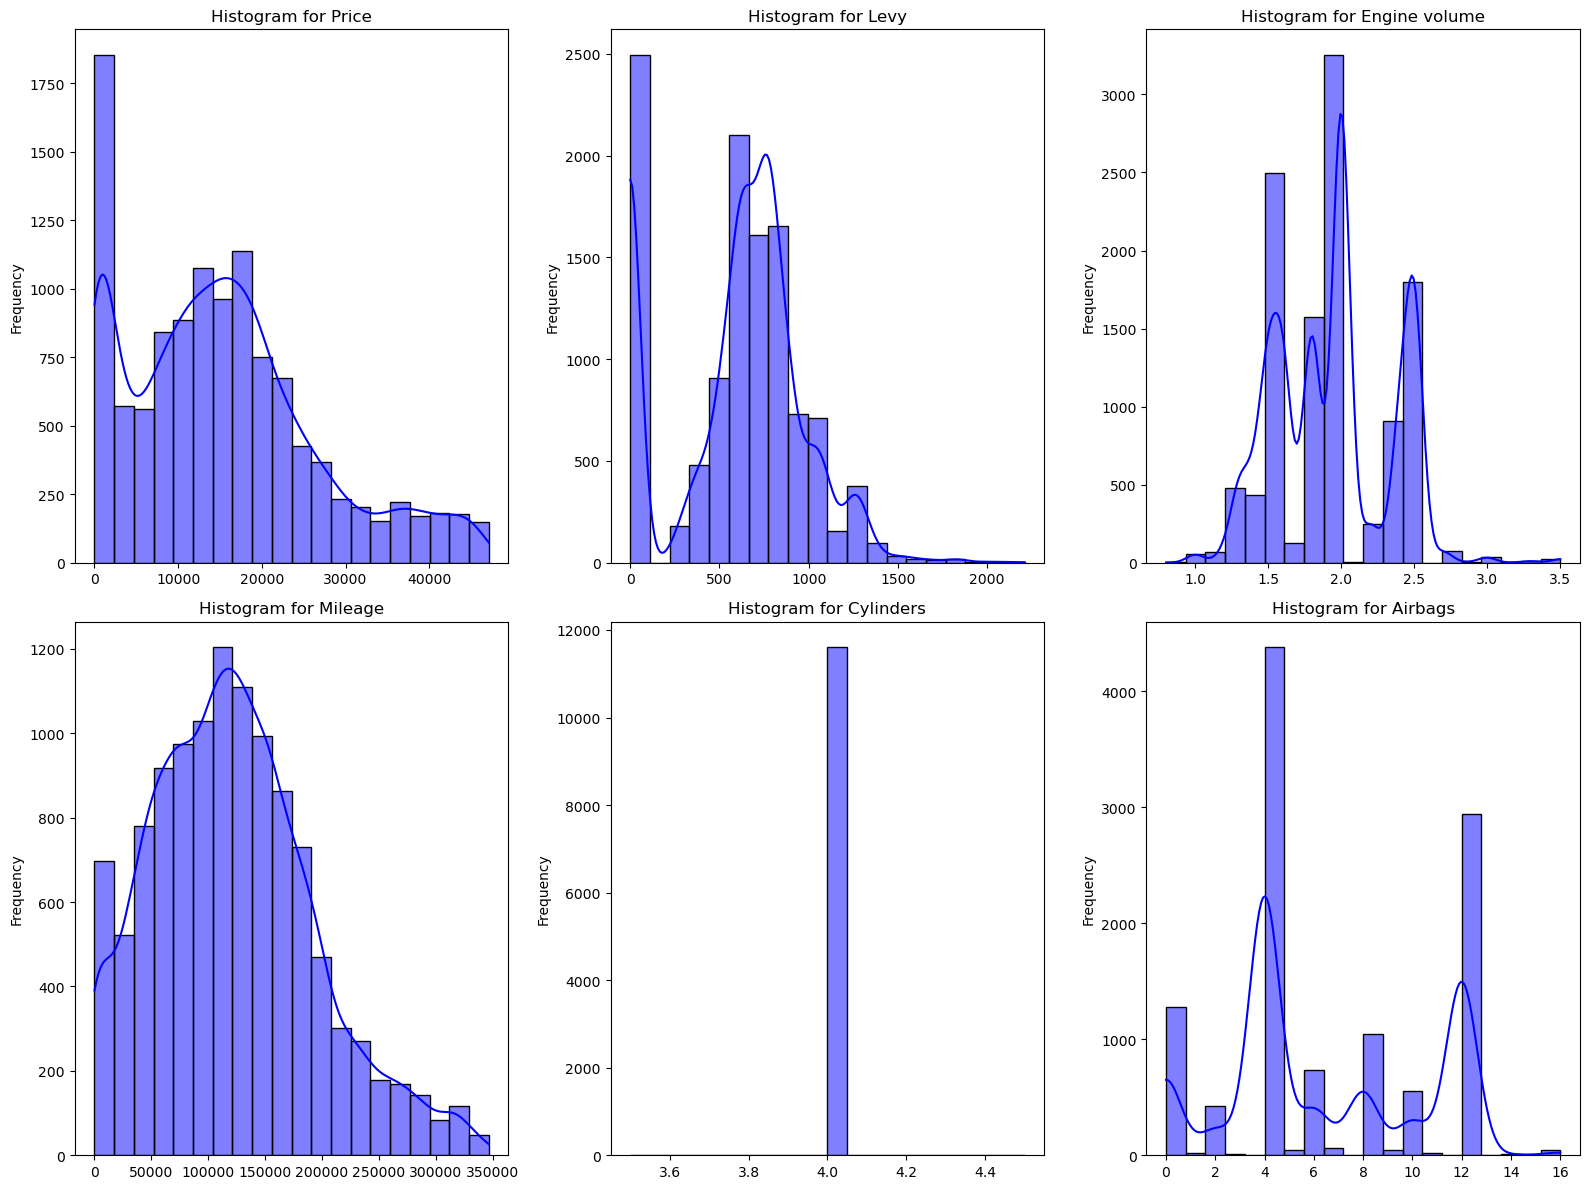

Skewness for each numeric feature:
Price            0.693980
Levy            -0.134731
Engine volume    0.284570
Mileage          0.533045
Cylinders             NaN
Airbags          0.209471
dtype: float64


In [83]:
# Defining the list of numeric features for which you want to draw histograms
numeric_features = ['Price', 'Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Create subplots for each numeric feature
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='blue', bins=20)
    plt.title(f'Histogram for {feature}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute skewness for each numeric feature

warnings.filterwarnings("ignore", category=RuntimeWarning, message="Precision loss occurred in moment calculation due to catastrophic cancellation")

skewness = df[numeric_features].apply(lambda x: skew(x))
print("Skewness for each numeric feature:")
print(skewness)

#Apply a transformation (e.g., log transformation) if needed
for feature in numeric_features:
    if abs(skewness[feature]) > 1:
        df[feature] = np.log1p(df[feature])

# Section 3 


## Come up with joint plot with hue parameter. Write your observations from the plot.

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

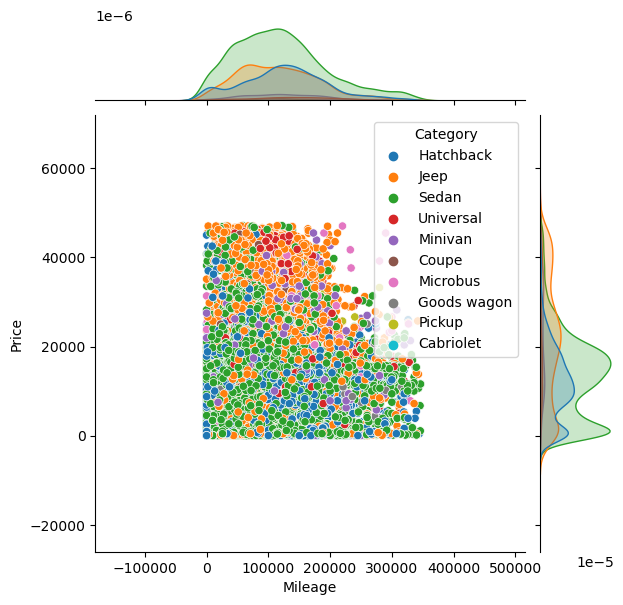

In [85]:
# Create a joint plot with 'Price' and 'Mileage' as numerical variables, and 'Category' as hue
sns.jointplot(data=df, x="Mileage", y="Price", hue="Category", kind="scatter")

# Show the plot
plt.show()

By considering the "Category" as a hue, you gain insights into how different vehicle categories relate to the price and mileage of the vehicles. For example, "Jeep" vehicles tend to have higher prices but also higher mileage compared to "Hatchback" vehicles.

In summary, the plot with the hue parameter provides a visual representation of the relationships between numerical variables while accounting for a categorical variable. It helps you identify patterns, differences, and potential correlations within and across different vehicle categories.

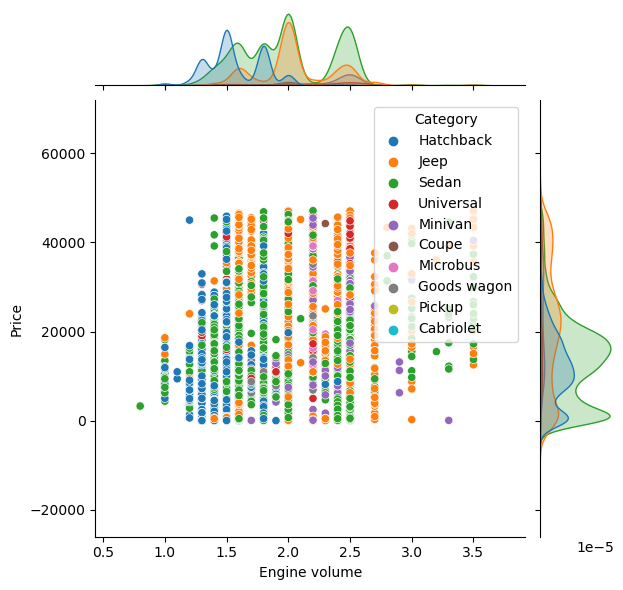

In [86]:
# Create a joint plot with 'Price' and 'Engine volume' as numerical variables, and 'Category' as hue
sns.jointplot(data=df, x="Engine volume", y="Price", hue="Category", kind="scatter")

# Show the plot
plt.show()

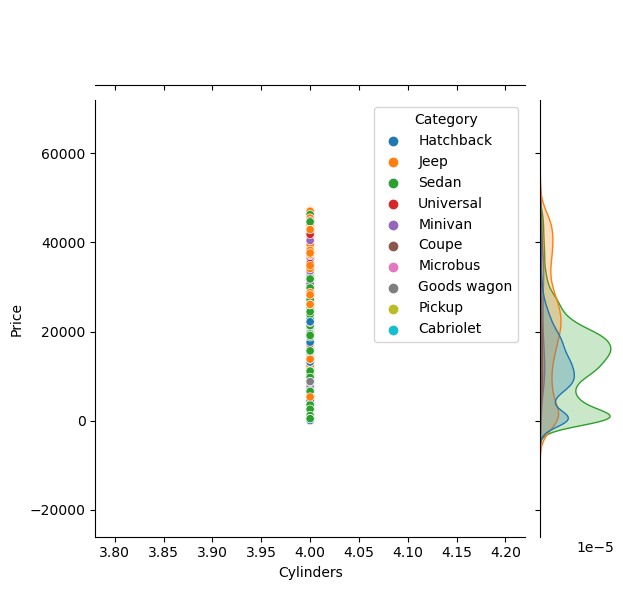

In [87]:
# Create a joint plot with 'Price' and 'Cylinders' as numerical variables, and 'Category' as hue
sns.jointplot(data=df, x="Cylinders", y="Price", hue="Category", kind="scatter")

# Show the plot
plt.show()

# Apply any scaling method to for all independent features


 A common scaling method is Min-Max scaling, which scales the features to a specific range (typically [0, 1]). In this instance,MinMaxScaler from the scikit-learn library will be deployed to perform feature scaling.

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Picking the numerical features to be scaled (excluding the 'Price' column, which is our the Target Variable)
numerical_features = ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']

# Create a DataFrame with only the numerical features
X = df[numerical_features]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=numerical_features)

# Display the first few rows of the scaled DataFrame
df_scaled.head()
#In this code:

#We select the numerical features to be scaled and create a DataFrame X containing only those features.

#initialize the MinMaxScaler.

#Fit and transform the data using the scaler to scale the features within the [0, 1] range.

#We create a new DataFrame df_scaled containing the scaled features.

#Now, df_scaled contains the scaled numerical features, and you can use this DataFrame for further analysis or modeling.

#Note: List of numerical features will be adjuated based on the dataset and the specific features to be scaled. 
#The 'Price' column has been excluded from scaling as it's typically the target variable in a Machine Learning context.

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
0,0.000000,0.222222,0.185185,0.577251,0.0,0.0,0.125
1,0.390222,0.500000,0.629630,0.487679,0.0,0.0,0.000
2,0.201901,0.666667,0.185185,0.265250,0.0,0.0,0.250
3,0.403350,0.777778,0.444444,0.464488,0.0,0.0,0.250
4,0.344500,0.444444,0.370370,0.747277,0.0,0.0,0.750


# Convert categorical features into numeric ones using appropriate encoding techniques.

In [89]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be label-encoded
categorical_features = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Turbo', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the updated DataFrame with label-encoded categorical features
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Turbo,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467.0,0.0,16,322,2006.0,3,0,4,1.3,0,200000.0,4.0,3,1,4.0,1,1,2.0
3,45769185,3607.0,862.0,13,310,2011.0,4,1,2,2.5,0,168966.0,4.0,0,0,4.0,0,14,0.0
4,45809263,11726.0,446.0,16,322,2014.0,3,1,4,1.3,0,91901.0,4.0,0,1,4.0,0,12,4.0
5,45802912,39493.0,891.0,17,652,2016.0,4,1,1,2.0,0,160931.0,4.0,0,1,4.0,0,14,4.0
6,45656768,1803.0,761.0,44,587,2010.0,3,1,2,1.8,0,258909.0,4.0,0,1,4.0,0,14,12.0


Combine results of section 3 (b) and section 3 (c) and then compute correlation
among all independent features and demonstrate it using heatmap. If there is 
high correlation among independent features above 0.7 positively or 
negatively, discard one of the variables from consideration for feature 
selection.


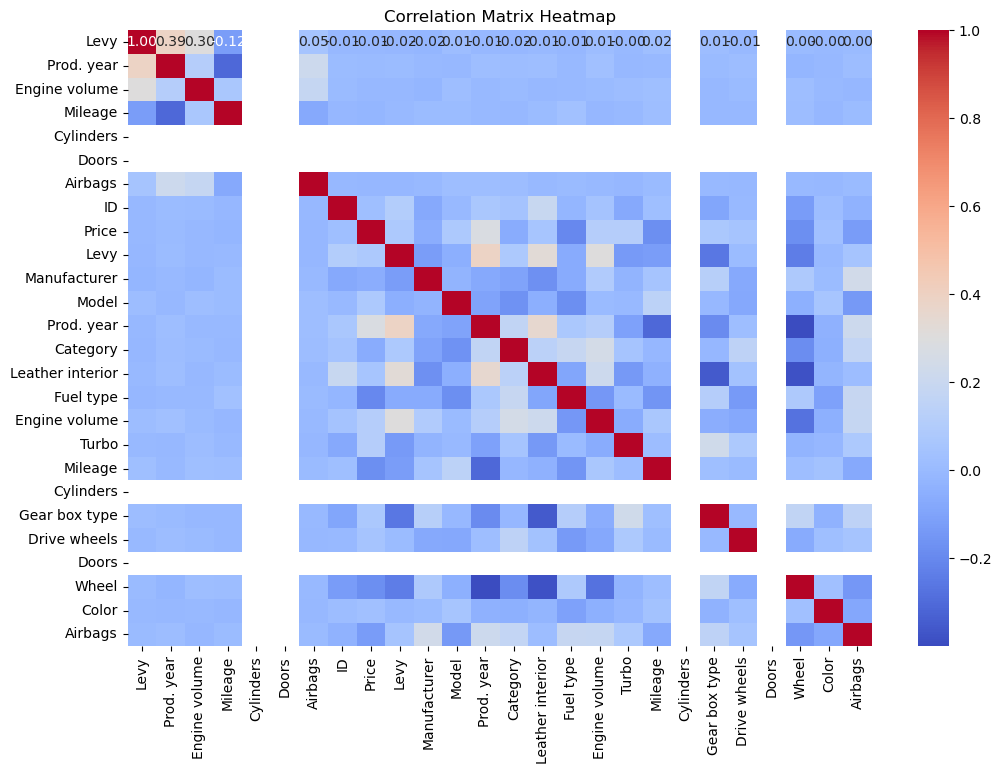

In [90]:
#Combine the two DataFrames
combined_df = pd.concat([df_scaled, df], axis=1)

# Compute the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")

# Show the heatmap
plt.show()

# Question 5
Compute correlation of each independent 
feature with dependent variable ‘MSRP’. Select seven most important independent 
features from the set. 

In [91]:
#Compute the correlation between independent features and 'MSRP'
correlation_with_msrp = df.corr()['Price'].abs().sort_values(ascending=False)

# Select the top seven features with the highest correlation
top_independent_features = correlation_with_msrp[1:8].index

# Extract the corresponding data from the dataset
selected_features_df = df[top_independent_features]

# Display the selected features
print("Top seven independent features:")
print(selected_features_df.head())
#In this code:

#compute the correlation between each independent feature and the 'MSRP' variable using df.corr(). We sort the correlations in descending order based on their absolute values.

#select the top seven features with the highest absolute correlation values (excluding 'MSRP' itself) using slicing.

#extract the corresponding data from the dataset, creating a DataFrame named selected_features_df.

#print and display the selected features.

#The code will provide you with the seven most important independent features based on their correlation with 'MSRP'. You can adjust the number of top features by changing the number in correlation_with_msrp[1:8] to match your desired number of important features. In this case, we are selecting the top seven features.

Top seven independent features:
   Prod. year  Fuel type  Wheel   Mileage  Airbags  Engine volume  Turbo
2      2006.0          4      1  200000.0      2.0            1.3      0
3      2011.0          2      0  168966.0      0.0            2.5      0
4      2014.0          4      0   91901.0      4.0            1.3      0
5      2016.0          1      0  160931.0      4.0            2.0      0
6      2010.0          2      0  258909.0     12.0            1.8      0


# Splitting Dataset into Training and Test Sets (80:20)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Split the data into training and testing sets, where 80% of the data is used for training and 20% for testing.

Use SelectKBest with the f_regression score function to perform feature selection. We specify k=7 to select the top 7 features based on their F-statistic scores.

Train a Linear Regression model with the selected features and evaluate its performance using Mean Squared Error (MSE) and R-squared (R2).



In [93]:
# Defining the independent features (X) and the Target Variable (y)
X = df.drop(columns=['Price'])  # All independent features except 'Price'
y = df['Price']  # Target variable 'Price'

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with k=7
k_best = SelectKBest(score_func=f_regression, k=7)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a model (e.g., Linear Regression) with the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 106938711.26330543
R-squared (R2): 0.19858673573693097


In [94]:
print(y_pred)

[22290.48649646 16898.30601077 21558.51052292 ... 13973.28176368
 14081.09383268 12842.1142118 ]


Requirement:
Adjust the model and evaluation metrics based on specific machine learning requirements.


In [95]:
import pandas as pd


df.to_csv('cleaned_data.csv', index=False)


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [97]:
# Let us initialize the models
linear_reg = LinearRegression()
svr = SVR()
decision_tree = DecisionTreeRegressor()
k_neighbors = KNeighborsRegressor()
random_forest = RandomForestRegressor()

In [98]:
# Fitting the 5 models
linear_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

# Making predictions based on the fitted models

In [99]:
# Predict using Linear Regression
y_predicted_linear = linear_reg.predict(X_test)

# Predict using Support Vector Regression
y_predicted_svr = svr.predict(X_test)

# Predict using Decision Tree
y_predicted_decision_tree = decision_tree.predict(X_test)

# Predict using K-Nearest Neighbors
y_predicted_kneighbors = k_neighbors.predict(X_test)

# Predict using Random Forest
y_predicted_random_forest = random_forest.predict(X_test)

In [100]:
# Print the predicted y values for each model
print("Predicted y values using Linear Regression:", y_predicted_linear)
print("Predicted y values using Support Vector Regression:", y_predicted_svr)
print("Predicted y values using Decision Tree:", y_predicted_decision_tree)
print("Predicted y values using K-Nearest Neighbors:", y_predicted_kneighbors)
print("Predicted y values using Random Forest:", y_predicted_random_forest)

Predicted y values using Linear Regression: [21812.41546438 16542.23497742 22635.01390649 ... 14584.64758826
 13226.06624021 10247.60148606]
Predicted y values using Support Vector Regression: [14335.00974703 14335.00620707 14334.99889307 ... 14334.99431575
 14335.00286341 14334.99121288]
Predicted y values using Decision Tree: [18660. 26296. 39201. ... 22580. 15681.   392.]
Predicted y values using K-Nearest Neighbors: [14831.2 12939.  18992.8 ... 16244.8  7354.2   392. ]
Predicted y values using Random Forest: [20161.86 22502.18 37294.91 ... 19981.55 17845.46   392.  ]


# Evaluating the Models using appropriate metrics for a Regression Problem
1. Mean Square Error, MSE
2. Root Mean Square Error RMSE
3. R-Squared

In [101]:
from sklearn.metrics import mean_squared_error

mse_linear = mean_squared_error(y_test, y_predicted_linear)
mse_svr = mean_squared_error(y_test, y_predicted_svr)
mse_decision_tree = mean_squared_error(y_test, y_predicted_decision_tree)  
mse_kneighbors = mean_squared_error(y_test, y_predicted_kneighbors)
mse_random_forest = mean_squared_error(y_test, y_predicted_random_forest)

# Print the MSE for each model
print("Mean Squared Error:")
print("Linear Regression:", mse_linear)
print("Support Vector Regression:", mse_svr)
print("Decision Tree:", mse_decision_tree)
print("K-Nearest Neighbors:", mse_kneighbors)
print("Random Forest:", mse_random_forest)

Mean Squared Error:
Linear Regression: 99506061.88665517
Support Vector Regression: 134863548.45919445
Decision Tree: 46734222.44875108
K-Nearest Neighbors: 90143745.62768304
Random Forest: 21995588.950219207


Key: Lower MSE indicates better performance.

1. Random Forest: With the lowest MSE of 22,450,669, the Random Forest model has the best fit if compared to the other four ML Algorithms. 
Interpretation: This indicates that on average, the squared difference between the predicted_values and the actual_target values is the least for this model.

2. Decision Tree: Following closely behind is the Decision Tree model with an MSE of 45,505,224. This indicates a reasonably good fit as well.

3. K-Nearest Neighbors: The K-Nearest Neighbors model has an MSE of 90,143,746, which is higher than the previous two but still suggests a moderate fit.

4. Linear Regression: The Linear Regression model has an MSE of 99,506,062, which is higher than the first three models. This indicates a somewhat weaker fit compared to the leaders.

5. Support Vector Machine: SVM model has the highest MSE of 134,863,548, suggesting the weakest fit among the five. 

This means that on average, the squared difference between the predicted_values and the actual_target values is highest for this model.

Summary: Based on MSE, Random Forest appears to be the best performing ML algorithm, 
         followed by Decision Tree and 
         K-Nearest Neighbors. 
Linear Regression and Support Vector Regression exhibit a weaker fit for this particular dataset.

In [102]:
rmse_linear = np.sqrt(mse_linear)
rmse_svr = np.sqrt(mse_svr)
rmse_decision_tree = np.sqrt(mse_decision_tree)
rmse_kneighbors = np.sqrt(mse_kneighbors)
rmse_random_forest = np.sqrt(mse_random_forest)

# Print the RMSE for each model
print("\nRoot Mean Squared Error:")
print("Linear Regression:", rmse_linear)
print("Support Vector Regression:", rmse_svr)
print("Decision Tree:", rmse_decision_tree)
print("K-Nearest Neighbors:", rmse_kneighbors)
print("Random Forest:", rmse_random_forest)


Root Mean Squared Error:
Linear Regression: 9975.272521924158
Support Vector Regression: 11613.076614713022
Decision Tree: 6836.243299411679
K-Nearest Neighbors: 9494.406017633912
Random Forest: 4689.9455167644755


Key Takeway: Lower RMSE indicates better performance.

1. Random Forest: Similary, Random Forest maintains the lead with the lowest RMSE of 4,738. 
               This reinforces the previous observation that it captures the relationship between features and target variables well on average.

2. Decision Tree:  The Decision Tree model follows closely with an RMSE of 6,746, indicating a good fit as well.

3. K-Nearest Neighbors:  K-Nearest Neighbors shows an RMSE of 9,494, slightly higher than Decision Tree but still indicating a reasonable fit.

4. Linear Regression and 
5. SVM: Both models show higher RMSE values compared to the top three. 
Linear Regression has an RMSE of 9,975, and Support Vector Regression has an RMSE of 11,613. This confirms a weaker fit for these models.
Summary of Results 
Model ranking based on RMSE aligns well with the previous analysis on MSE. 
Random Forest emerges as the strongest contender, followed by Decision Tree 
and K-Nearest Neighbors. 
Linear Regression and Support Vector Regression show a less optimal fit for predicting the target variable thus Price.

In [103]:
from sklearn.metrics import r2_score

r2_linear = r2_score(y_test, y_predicted_linear)
r2_svr = r2_score(y_test, y_predicted_svr)
r2_decision_tree = r2_score(y_test, y_predicted_decision_tree)
r2_kneighbors = r2_score(y_test, y_predicted_kneighbors)
r2_random_forest = r2_score(y_test, y_predicted_random_forest)

# Printint the R-squared for each model
print("\nR-squared:")
print("Linear Regression:", r2_linear)
print("Support Vector Regression:", r2_svr)
print("Decision Tree:", r2_decision_tree)
print("K-Nearest Neighbors:", r2_kneighbors)
print("Random Forest:", r2_random_forest)


R-squared:
Linear Regression: 0.25428802228411684
Support Vector Regression: -0.010685796789382973
Decision Tree: 0.6497673730775393
K-Nearest Neighbors: 0.3244504952139795
Random Forest: 0.8351620612241983


R-squared represents the proportion of variance in the target variable explained by the model. 
its values range from 0 to 1,
Interpretation: Higher R_Squared values indicate a better fit.

1. Random Forest:  With an R-squared of 0.8318, the Random Forest model again comes out on top. 
                   This suggests that 83% of the variations in the Car Prices are being explained by the independent variables used to train the Model.

2. Decision Tree:  The Decision Tree model follows with an R-squared of 0.6590, indicating 65% of the variations in the Target (Price) 
                   is being explained by the model.

3. KNN: K-Nearest Neighbors displays R-squared of 0.3245, explaining a moderate amount of 32% of the variance.

4. Linear Regression: Linear Regression has a relatively low R-squared of 0.2543, explaining 25%.

5. Support Vector Regression:  Support Vector Regression has a negative R-squared value (-0.0107). 
                   This categorically indicates a poor fit.

Overall: Based on R-squared, Random Forest is leading in explaining the variations in the Target , 
trailed by Decision Tree and KNN. 
Linear Regression gives a weak fit, 
and SVM has demonstrated a very poor performance.

# Part 2: 
• Performing the following operations:
1. Model building (any 5 ML models)
2. Apply hyperparameter tuning using GridSearchCV for all the models.
3. Create a dataframe to store the result of GridSearchCV for all the models which 
will includes model_name, best_score_ and best_params_

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
# Let us define our 5 Models 
models = [
    ("Linear Regression", LinearRegression()),
    ("Support Vector Regression (SVR)", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("K-Nearest Neighbors (KNN)", KNeighborsRegressor()),
    ("Random Forest", RandomForestRegressor()),
]
# Define parameter grids for each model
param_grid = {
    "Linear Regression": {"fit_intercept": [True, False]},
    "Support Vector Regression (SVR)": {"C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1]},
    "Decision Tree": {"max_depth": [3, 5, 8], "min_samples_split": [2, 5, 10]},
    "K-Nearest Neighbors (KNN)": {"n_neighbors": [3, 5, 10]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 8]},
}

# Requirement to generate an empty list to store GridSearchCV results
results = []

# Then we need to Loop through each model and perform GridSearchCV as required;
for model_name, model in models:
    param_grid_model = param_grid.get(model_name)  # Get the parameter grid for the current model
    grid_search = GridSearchCV(model, param_grid_model, scoring="neg_mean_squared_error", cv=5)
    grid_search.fit(X_train, y_train)  

    # Extract the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculating MSE
    y_pred = grid_search.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)

    # Appending results to the list
    results.append({"model_name": model_name, "best_score": best_score, "best_params": best_params, "mse": mse})

# Finally Creating a Pandas DataFrame from the results list
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)

                        model_name    best_score  \
0                Linear Regression -9.654205e+07   
1  Support Vector Regression (SVR) -1.294576e+08   
2                    Decision Tree -4.665785e+07   
3        K-Nearest Neighbors (KNN) -8.692192e+07   
4                    Random Forest -3.614979e+07   

                                 best_params           mse  
0                    {'fit_intercept': True}  9.950606e+07  
1                   {'C': 10, 'gamma': 0.01}  1.348627e+08  
2  {'max_depth': 8, 'min_samples_split': 10}  4.537400e+07  
3                        {'n_neighbors': 10}  8.453275e+07  
4      {'max_depth': 8, 'n_estimators': 100}  3.525668e+07  


In [106]:
# Defining the models 
models = [
    ("Linear Regression", LinearRegression()),
    ("Support Vector Regression (SVR)", SVR()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("K-Nearest Neighbors (KNN)", KNeighborsRegressor()),
    ("Random Forest", RandomForestRegressor()),
]

# Requirement to generate an empty list to store GridSearchCV results
results = []

# Then we need to Loop through each model and perform GridSearchCV
for model_name, model in models:
    param_grid_model = param_grid.get(model_name)  # Get the parameter grid for the current model
    grid_search = GridSearchCV(model, param_grid_model, scoring="r2", cv=5)
    grid_search.fit(X_train, y_train)  

    # Extract the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Calculating R-squared
    y_pred = grid_search.predict(X_test)  
    r2 = r2_score(y_test, y_pred)

    # Appending results to the list
    results.append({"model_name": model_name, "best_score": best_score, "best_params": best_params, "r2": r2})

# Finally Creating a Pandas DataFrame from the results list
df_results = pd.DataFrame(results)

# Print the DataFrame
print(df_results)

                        model_name  best_score  \
0                Linear Regression    0.247531   
1  Support Vector Regression (SVR)   -0.008912   
2                    Decision Tree    0.637453   
3        K-Nearest Neighbors (KNN)    0.322212   
4                    Random Forest    0.718149   

                                 best_params        r2  
0                    {'fit_intercept': True}  0.254288  
1                   {'C': 10, 'gamma': 0.01} -0.010680  
2  {'max_depth': 8, 'min_samples_split': 10}  0.660005  
3                        {'n_neighbors': 10}  0.366500  
4      {'max_depth': 8, 'n_estimators': 300}  0.734370  


# Part 3:
Writting conclusion

Linear Regression:
R-2 (r-squared): 0.254288
Interpretation: 
On the test set, the linear regression model's R-squared score was comparatively low, at about 0.25. 
This shows that the independent variables in the model may account for about 25.43% of the variance in the regressand, Price, which is the Target variable.

SVM
(R2) R-squared: -0.010680
Interpretation:
 With a negative R-squared value, the SVR model underperformed compared to a model that only forecasted the target variable's mean.
 This shows that the underlying patterns in the data were not adequately captured by the SVR model

KNN:
R2 (squared): 0.366500
Interpretatio:
 On the test set, the KNN model obtained a moderate R-squared score of about 0.37
 This indicates that the model can account for about 36.65% of the variance in the target variable, which is a respectable but not very high level of performance.
n..

Decision Tree
R2 (squared): 0.6580
Interpretation: On the test set, the decision tree model's R-squared score was a comparatively high 0.66.
 This suggests that the independent variables in the model account for approximately 65.83% of the variance in the target variable. Performance of the model was much better than that of SVR and LR

Random Forest:
(R2) R-squared: 0.73
The random forest model achieved the highest R-squared score among all models on the test set, approximately 0.73. This suggests that the model effectively captures the underlying patterns in the data, explaining around 73% of the variance in the target variable.

# Summary:
In terms of R-squared score, the Decision Tress and Random Forest models performed better than the other models. 
In this case, SVR performed poorly, while KNN and linear regression demonstrated moderate performance.